# Generate noisy data

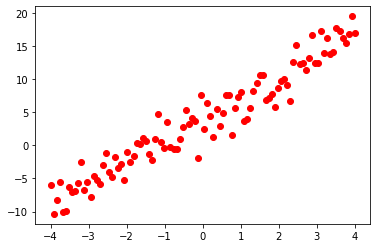

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate clean data
x = np.linspace(-4, 4, 100)
y = 3*x + 4

# Add measurement noise
noise = 2 * np.random.randn(*y.shape)
y = y + noise

# Plot noisy data
plt.plot(x, y, 'ro', label='Noisy Data')
plt.show()

# Perform linear regression to estimate model parameters

$y=mx + b$  

OR  

$y = [x,~1]\theta$  
where  
$\theta = [m,~b]^T$

In [2]:
theta = np.polyfit(x, y, 1)
m, b = np.round(theta, 3)
print(f'm = {m}, b = {b}')

m = 3.153, b = 3.882


# Evaluate model over entire domain

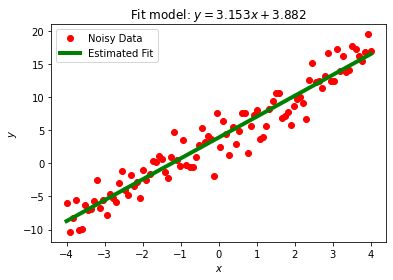

In [3]:
yhat = np.polyval(theta, x)

plt.plot(x, y, 'ro', label='Noisy Data')
plt.plot(x, yhat, 'g', lw=4, label='Estimated Fit')

# Show plot with labels
plt.legend(loc='best')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title(f'Fit model: $y = {m} x + {b}$')
plt.show()

# Certify estimate

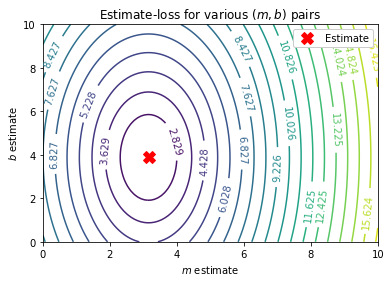

In [4]:
# Model's loss function
def loss(m, b):
    '''
    Returns the root mean squared error between
    actual y and theta-based estimate yhat.

    '''
    theta = np.array([m, b])
    yhat = np.polyval(theta, x)
    error = np.sqrt(np.mean((y - yhat)**2))
    return error

# Compute loss over 2D space of (m, b) pairs
mesh = np.linspace(0, 10, 100)
m, b = np.meshgrid(mesh, mesh)
elementwise_loss = np.vectorize(loss)
losses = np.array([*map(elementwise_loss, m, b)])
min_loss, max_loss = np.min(losses), np.max(losses)

# Plot loss over 2D space of (m, b) pairs
fig, ax = plt.subplots()
contour = ax.contour(m, b, losses, levels=np.linspace(min_loss, max_loss, 20))
ax.clabel(contour)

# Plot our estimate
m, b = theta
plt.plot(m, b, 'rX', ms=12, label='Estimate')

# Label plot
plt.title('Estimate-loss for various $(m, b)$ pairs')
plt.xlabel('$m$ estimate')
plt.ylabel('$b$ estimate')
plt.legend(framealpha=1.0)
plt.show()

Our estimate's loss

In [5]:
loss(m, b)

2.0280991502335044

# CHALLENGE TO STUDENT

Kernel trick for non-linear regression
1. Construct a set of $(x,y)$ pairs that are not linearly related.
2. Come up with a function $\phi(\cdot)$ such that $\phi(x)$ and $y$ are linearly related.
3. Then, perform linear regression on pairs $(\phi(x),y)$ and certify your estimate, similar to what's done above.